In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [3]:
nRowsRead = 1000
df=pd.read_csv('QCM6.csv',delimiter=';', nrows = nRowsRead)
df1=pd.read_csv('QCM7.csv',delimiter=';', nrows = nRowsRead)
df3=pd.read_csv('QCM10.csv',delimiter=';', nrows = nRowsRead)
df2=pd.read_csv('QCM12.csv',delimiter=';', nrows = nRowsRead)
df4=pd.read_csv('QCM3.csv',delimiter=';', nrows = nRowsRead)

In [4]:
df=df.append(df1)
df=df.append(df2)
df=df.append(df3)
df=df.append(df4)


In [5]:
df.shape

(125, 15)

In [99]:
df.head(10)

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-11.82,-13.29,-19.32,-26.28,-38.14,-50.09,-59.78,-75.04,-85.63,-104.66,1,0,0,0,0
1,-11.54,-14.18,-25.35,-32.75,-48.77,-60.08,-75.41,-89.72,-104.25,-121.90,1,0,0,0,0
2,-12.45,-15.81,-33.33,-40.64,-61.50,-72.12,-91.75,-104.67,-124.21,-139.76,1,0,0,0,0
3,-14.67,-18.49,-40.56,-47.67,-72.11,-82.19,-106.26,-118.26,-141.95,-155.84,1,0,0,0,0
4,-18.07,-19.74,-47.08,-53.50,-81.15,-89.81,-117.91,-128.10,-156.66,-168.72,1,0,0,0,0
5,-98.63,-97.92,-137.15,-131.93,-191.17,-180.52,-260.06,-240.69,-352.22,-321.20,0,1,0,0,0
6,-96.62,-96.50,-136.86,-131.75,-192.76,-182.30,-264.07,-245.29,-357.64,-327.04,0,1,0,0,0
7,-95.58,-95.61,-137.43,-132.20,-193.50,-183.30,-266.77,-248.06,-359.32,-329.25,0,1,0,0,0
8,-94.48,-94.49,-136.49,-132.39,-193.90,-184.20,-267.82,-249.31,-361.72,-331.38,0,1,0,0,0
9,-94.04,-93.29,-136.13,-130.11,-194.96,-183.40,-267.72,-249.56,-360.72,-330.82,0,1,0,0,0


In [23]:
df.describe()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.00000,125.00000,125.00000,125.00000
mean,-52.384480,-51.529200,-82.660160,-78.155200,-117.079120,-107.839040,-151.437360,-138.120160,-190.693680,-173.198880,0.20000,0.20000,0.20000,0.20000,0.20000
std,26.613388,24.374974,42.272666,36.560875,62.101935,52.594443,82.641805,70.392947,108.159961,92.772823,0.40161,0.40161,0.40161,0.40161,0.40161
min,-98.990000,-102.020000,-174.990000,-158.710000,-261.380000,-224.800000,-341.090000,-289.880000,-447.740000,-381.940000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-69.990000,-66.490000,-110.460000,-105.210000,-157.610000,-144.980000,-210.780000,-189.320000,-263.800000,-250.300000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,-58.410000,-55.730000,-91.650000,-82.390000,-118.700000,-105.510000,-156.310000,-126.300000,-192.030000,-157.010000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,-28.790000,-35.170000,-43.820000,-50.840000,-58.240000,-68.000000,-75.410000,-77.510000,-93.950000,-91.330000,0.00000,0.00000,0.00000,0.00000,0.00000
max,-9.400000,-7.950000,-14.430000,-17.280000,-24.640000,-27.350000,-35.280000,-39.910000,-40.630000,-49.870000,1.00000,1.00000,1.00000,1.00000,1.00000


In [25]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

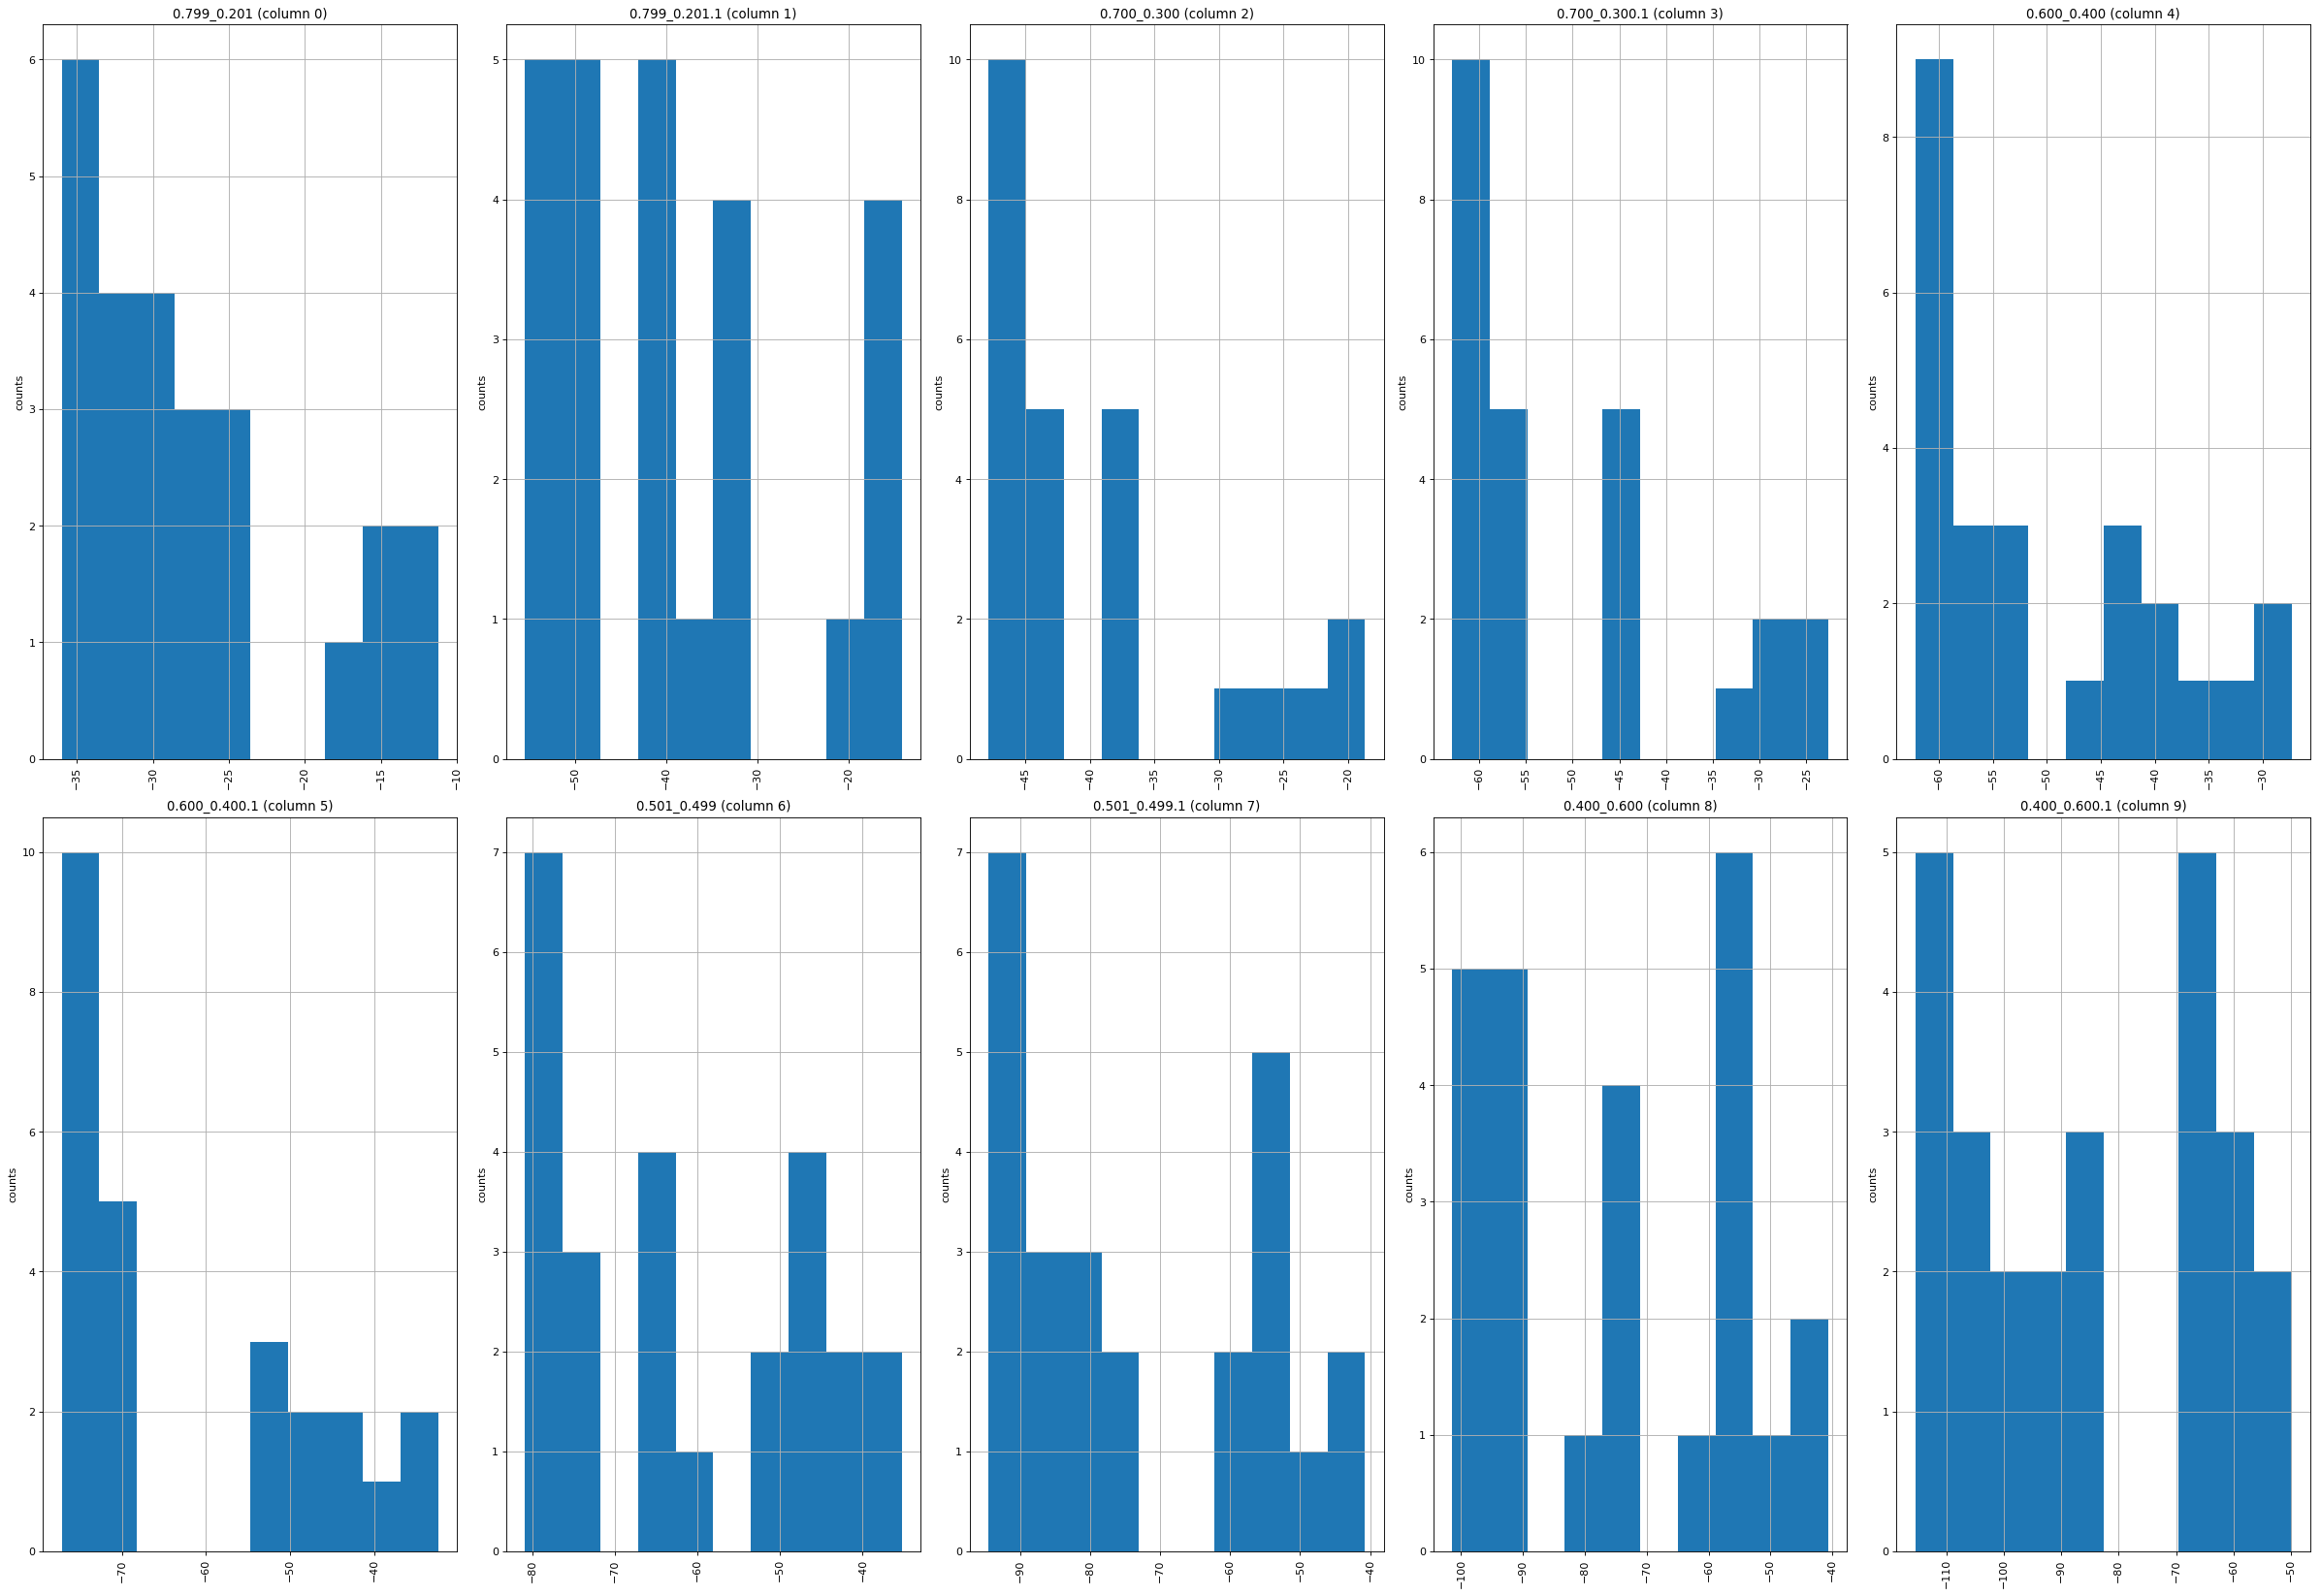

In [26]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 720x720 with 0 Axes>

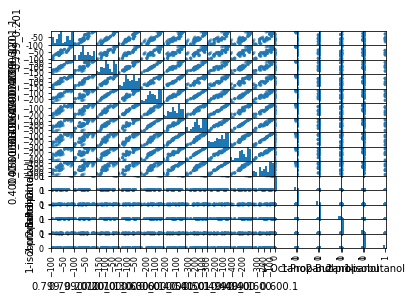

In [29]:
plt.figure(figsize=(10, 10))
scatter_matrix(df)
plt.show()

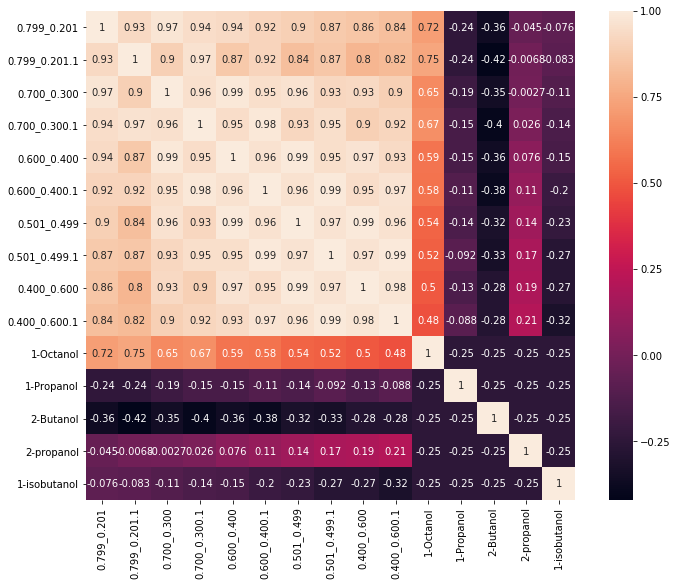

In [30]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True,square=True);

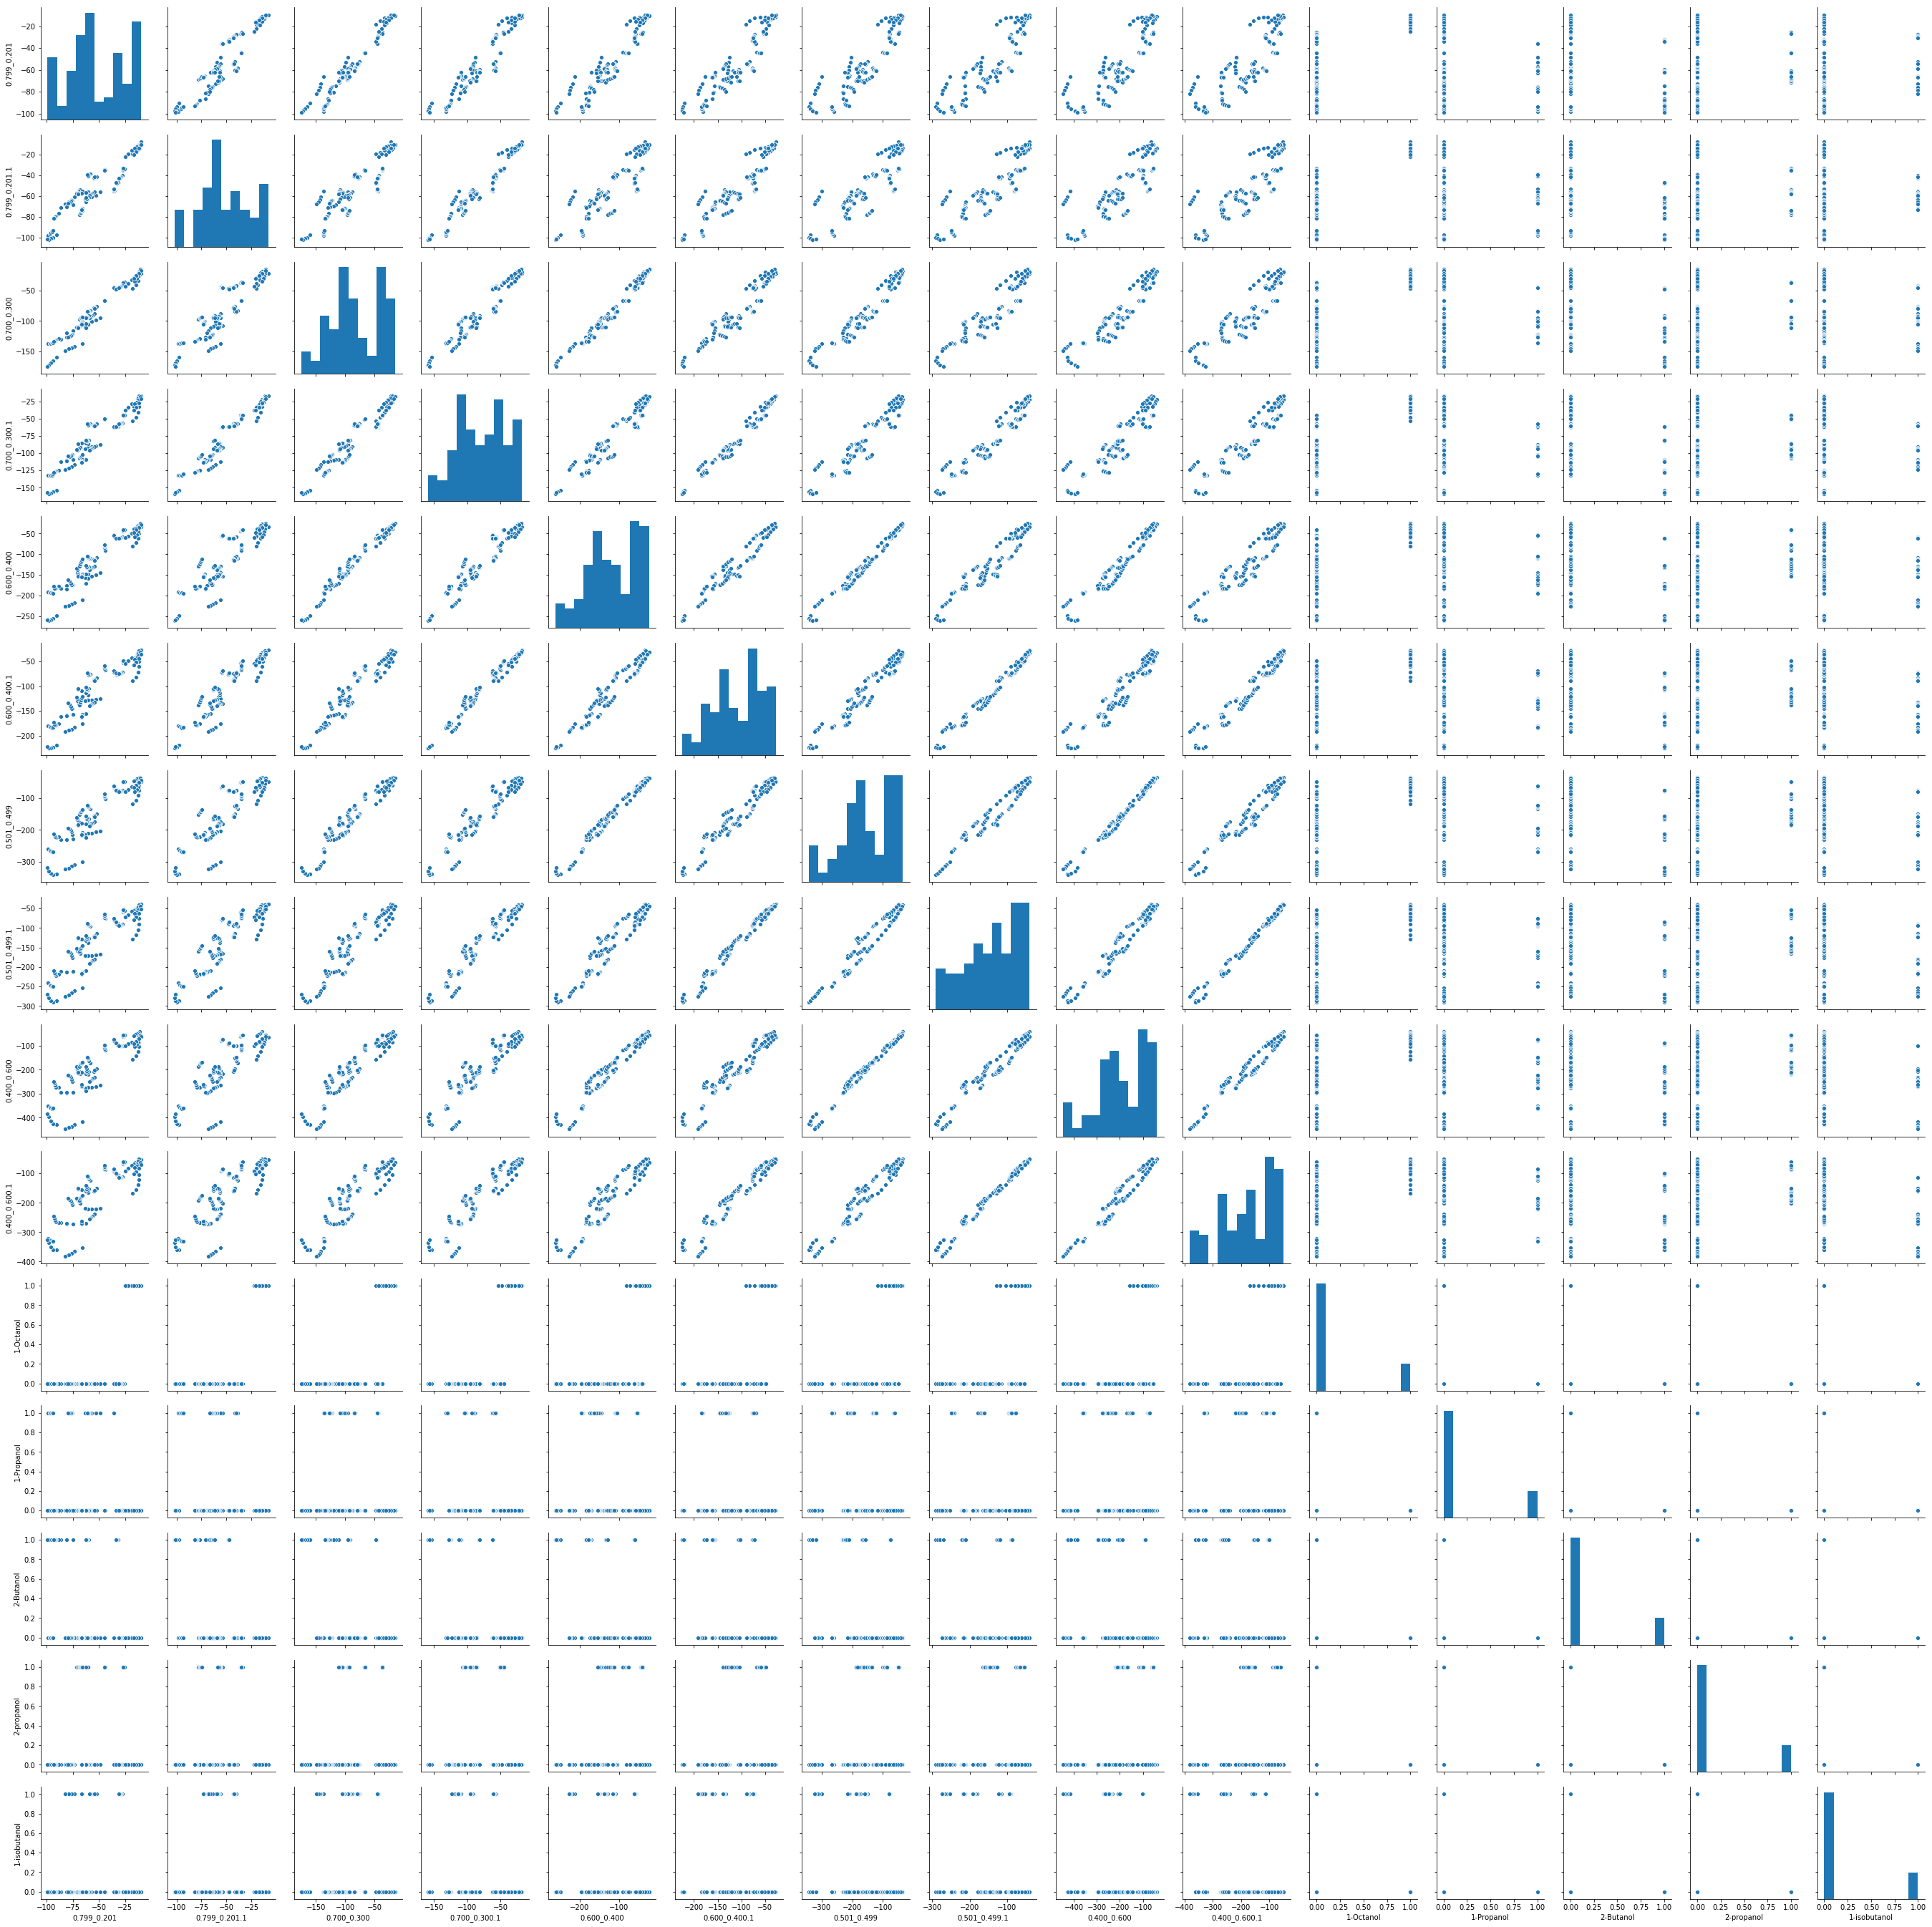

In [43]:
sns.pairplot(df,vars=['0.799_0.201', '0.799_0.201.1', '0.700_0.300', '0.700_0.300.1',
       '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1',
       '0.400_0.600', '0.400_0.600.1', '1-Octanol', '1-Propanol', '2-Butanol',
       '2-propanol', '1-isobutanol'])

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


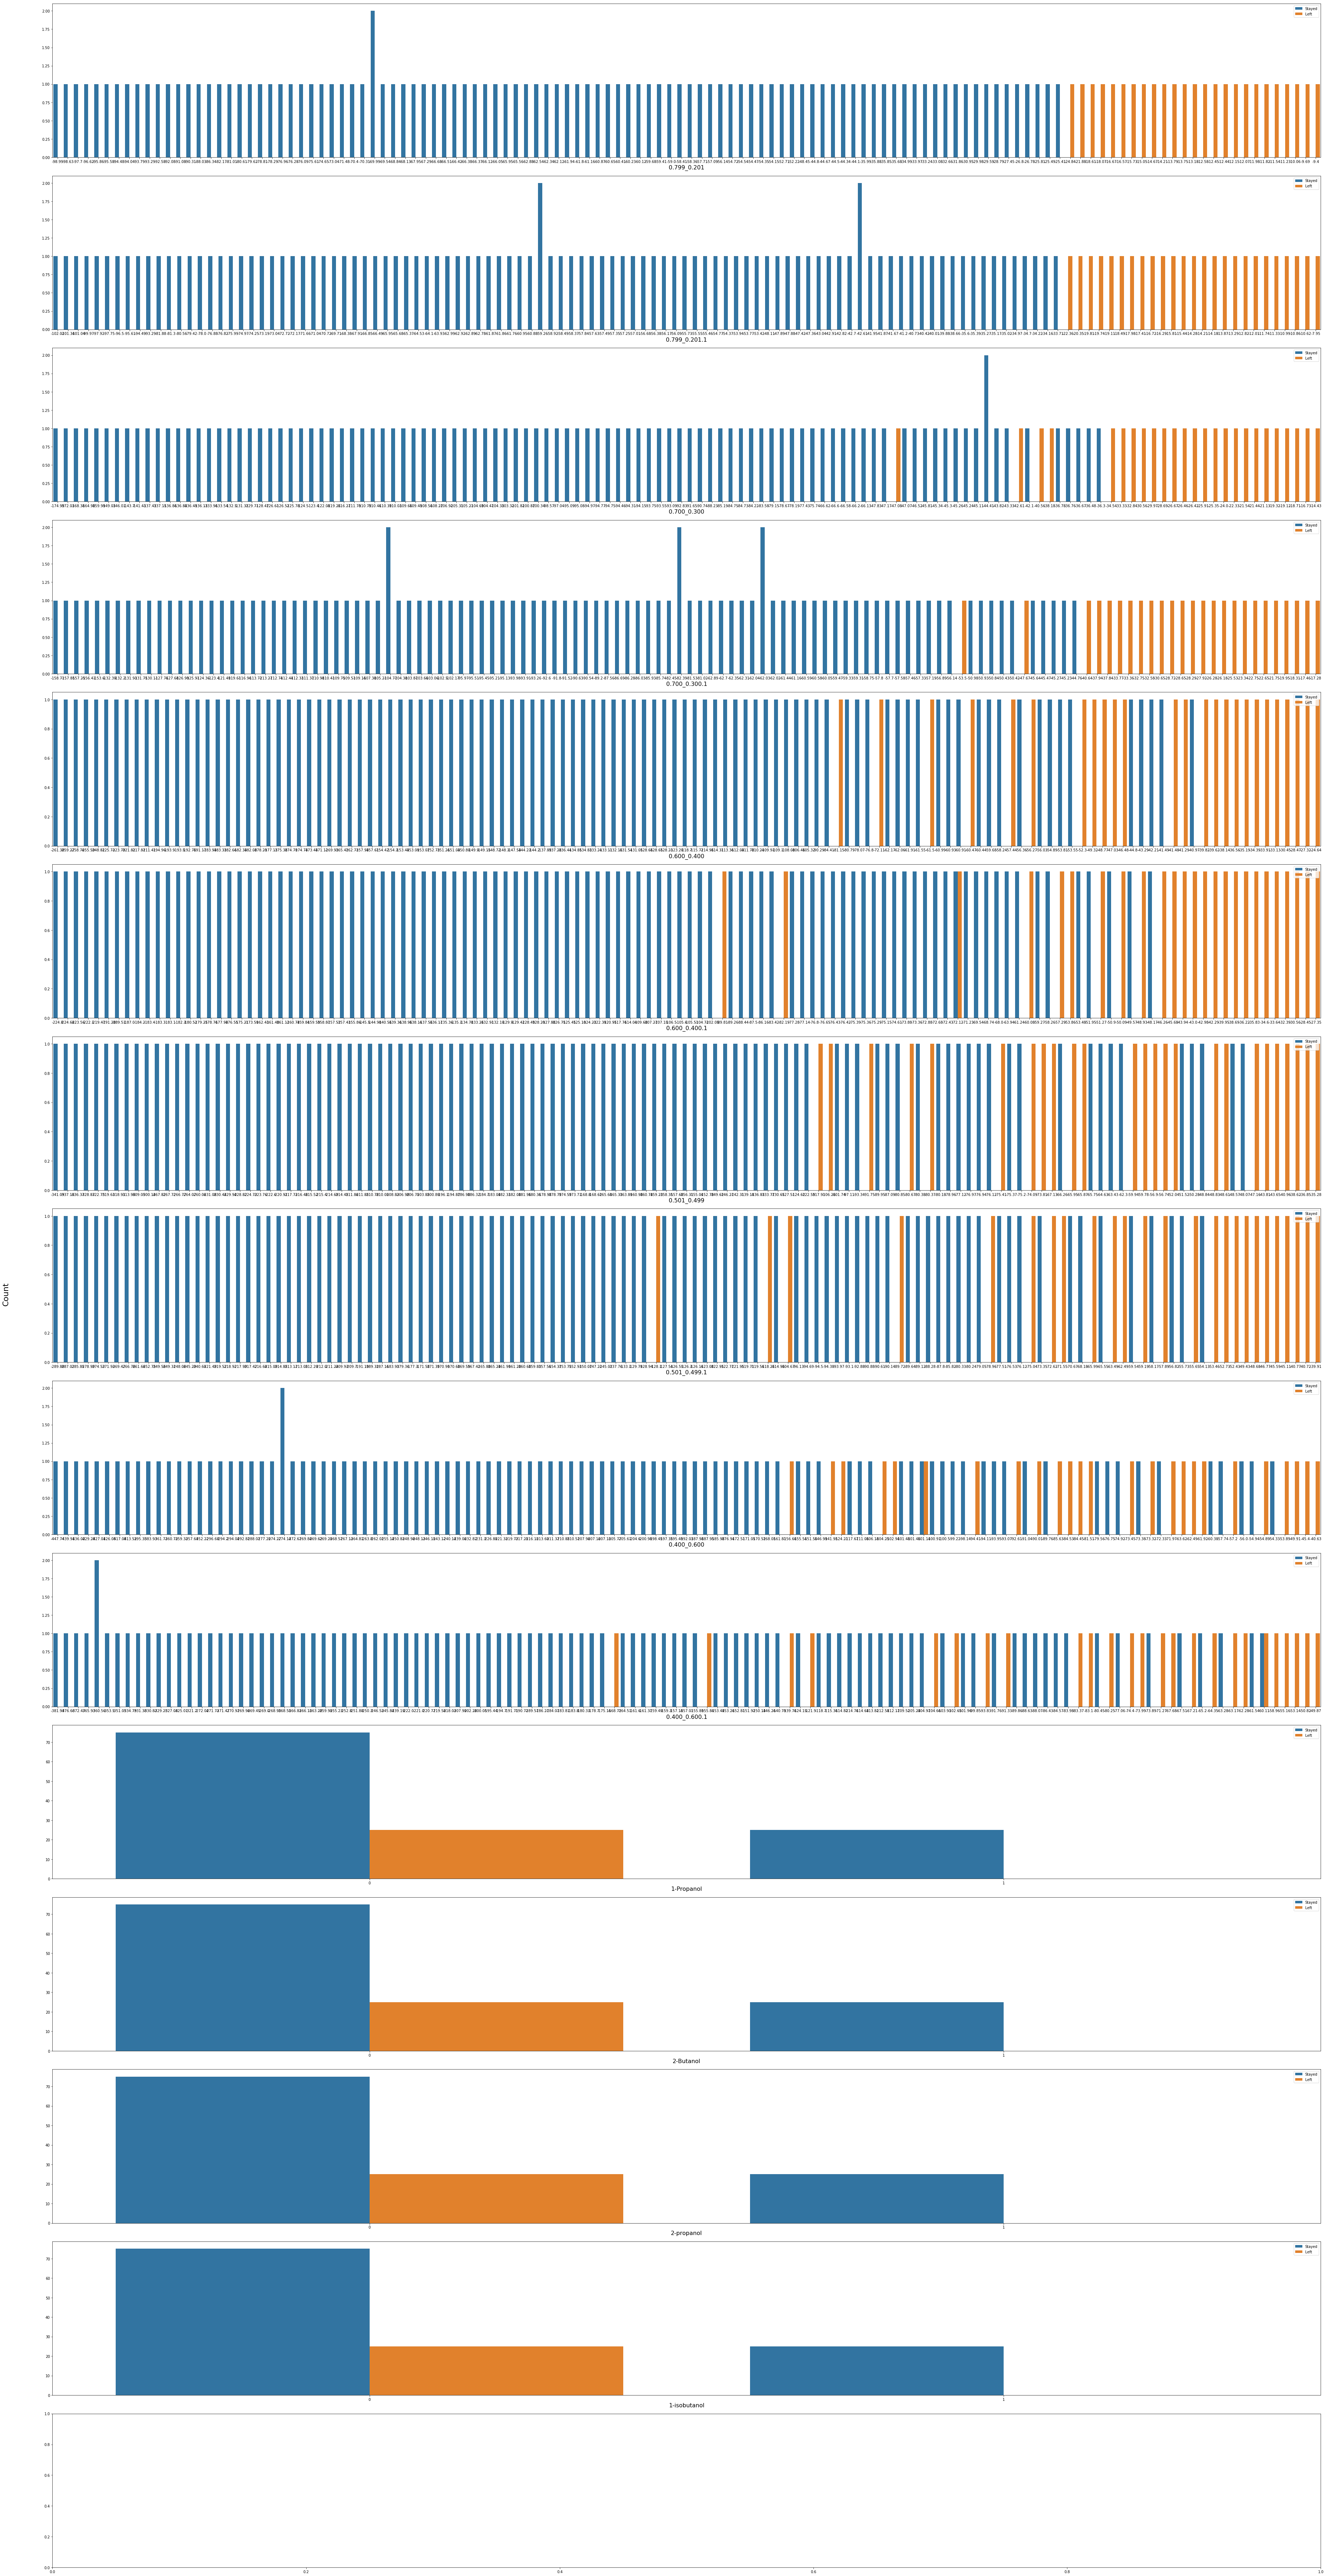

In [40]:
f, axes = plt.subplots(15, 1, figsize=(50,100), tight_layout=True)
x_vars = ['0.799_0.201', '0.799_0.201.1', '0.700_0.300', '0.700_0.300.1',
       '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1',
       '0.400_0.600', '0.400_0.600.1',  '1-Propanol', '2-Butanol',
       '2-propanol', '1-isobutanol']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='1-Octanol', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: 0.089296
Kurtosis: -1.114495
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.006771
Kurtosis: -0.619821
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.094416
Kurtosis: -1.053449
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.185532
Kurtosis: -0.846016


(None, None, None)

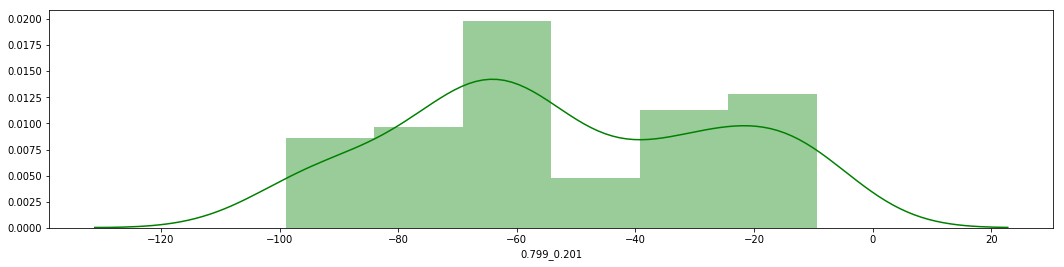

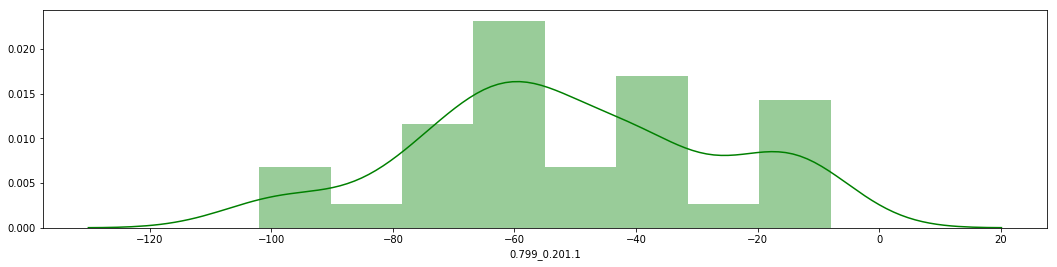

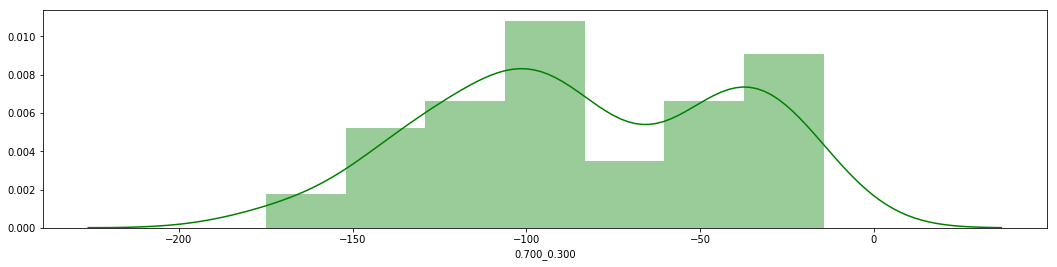

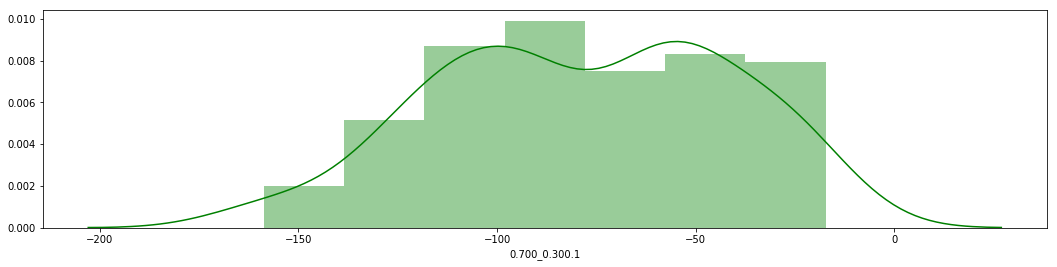

In [45]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['0.799_0.201'],color='g')),print("Skewness: %f" % df['0.799_0.201'].skew()),print("Kurtosis: %f" % df['0.799_0.201'].kurt())
plt.figure(figsize=(18,4))
print(sns.distplot(df['0.799_0.201.1'],color='g')),print("Skewness: %f" % df['0.799_0.201.1'].skew()),print("Kurtosis: %f" % df['0.799_0.201.1'].kurt())
plt.figure(figsize=(18,4))
print(sns.distplot(df['0.700_0.300'],color='g')),print("Skewness: %f" % df['0.700_0.300'].skew()),print("Kurtosis: %f" % df['0.700_0.300'].kurt())
plt.figure(figsize=(18,4))
print(sns.distplot(df['0.700_0.300.1'],color='g')),print("Skewness: %f" % df['0.700_0.300.1'].skew()),print("Kurtosis: %f" % df['0.700_0.300.1'].kurt())

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.327743
Kurtosis: -0.777875
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.375302
Kurtosis: -0.874899
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.463032
Kurtosis: -0.642235
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness: -0.479961
Kurtosis: -0.894144


(None, None, None)

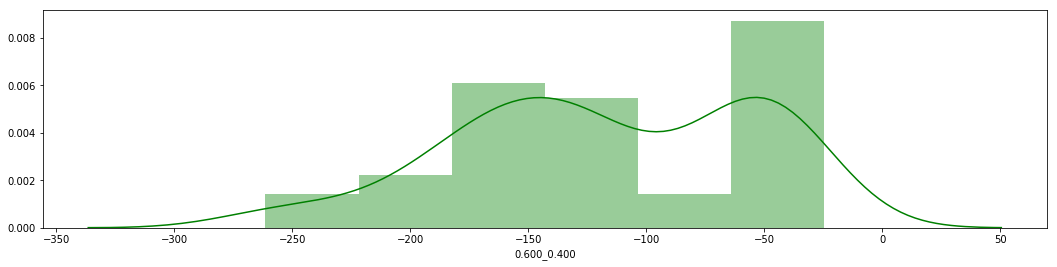

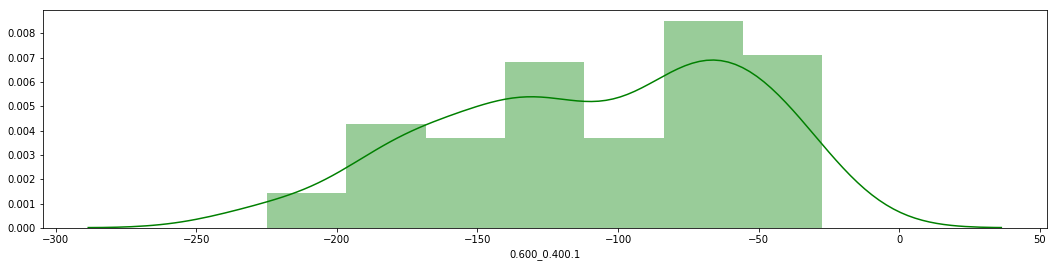

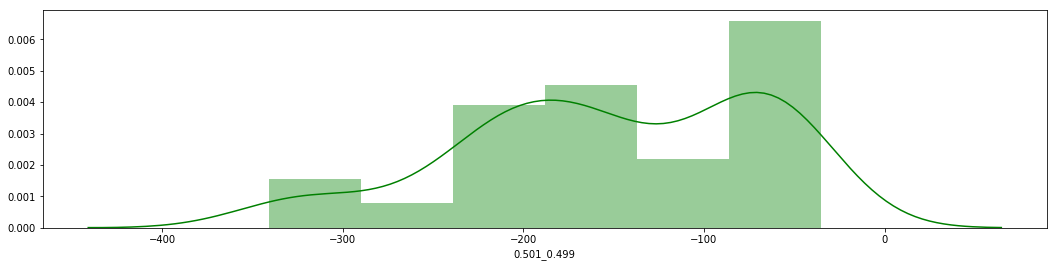

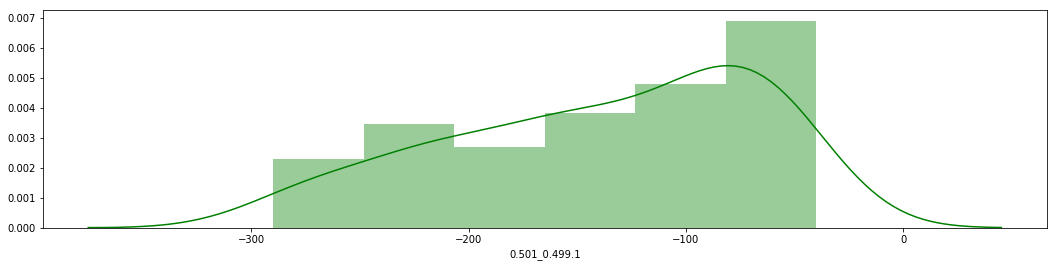

In [46]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['0.600_0.400'],color='g')),print("Skewness: %f" % df['0.600_0.400'].skew()),print("Kurtosis: %f" % df['0.600_0.400'].kurt())
plt.figure(figsize=(18,4))
print(sns.distplot(df['0.600_0.400.1'],color='g')),print("Skewness: %f" % df['0.600_0.400.1'].skew()),print("Kurtosis: %f" % df['0.600_0.400.1'].kurt())
plt.figure(figsize=(18,4))
print(sns.distplot(df['0.501_0.499'],color='g')),print("Skewness: %f" % df['0.501_0.499'].skew()),print("Kurtosis: %f" % df['0.501_0.499'].kurt())
plt.figure(figsize=(18,4))
print(sns.distplot(df['0.501_0.499.1'],color='g')),print("Skewness: %f" % df['0.501_0.499.1'].skew()),print("Kurtosis: %f" % df['0.501_0.499.1'].kurt())

In [24]:
df.columns

Index(['0.799_0.201', '0.799_0.201.1', '0.700_0.300', '0.700_0.300.1',
       '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1',
       '0.400_0.600', '0.400_0.600.1', '1-Octanol', '1-Propanol', '2-Butanol',
       '2-propanol', '1-isobutanol'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


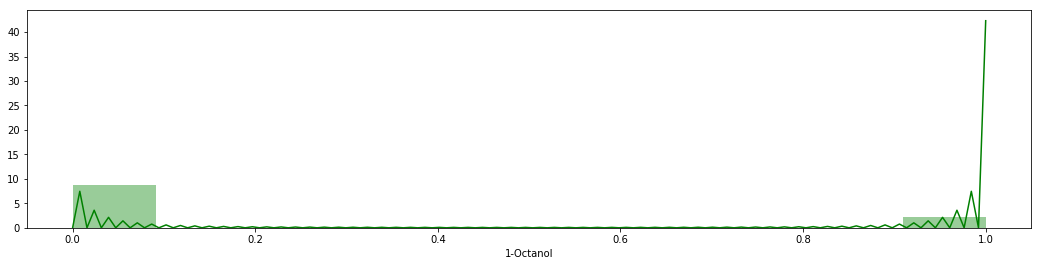

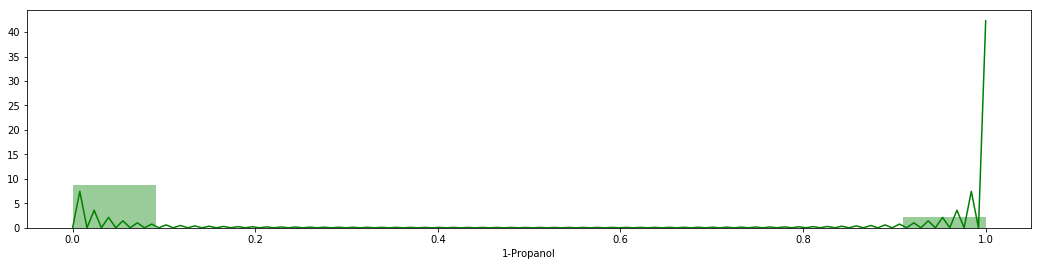

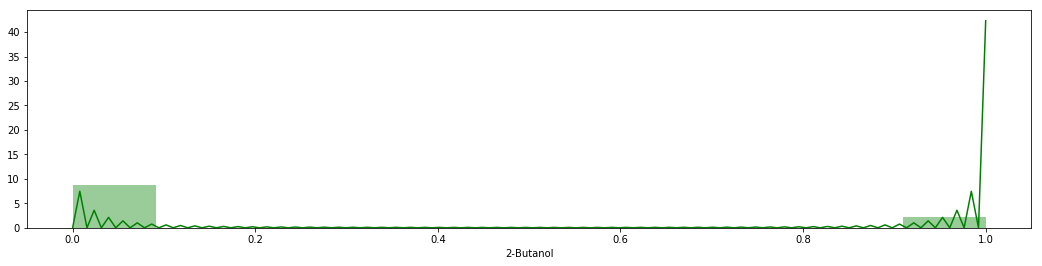

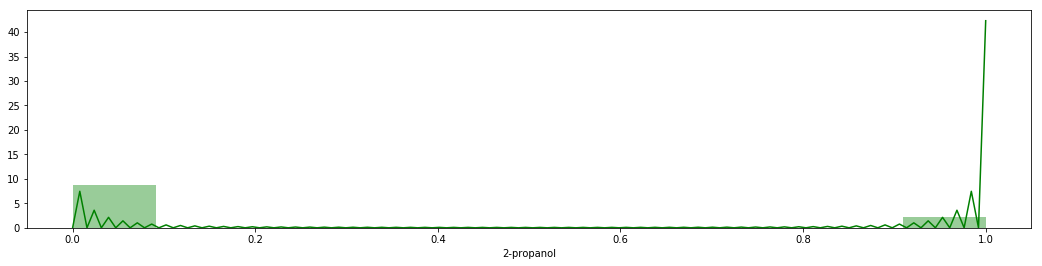

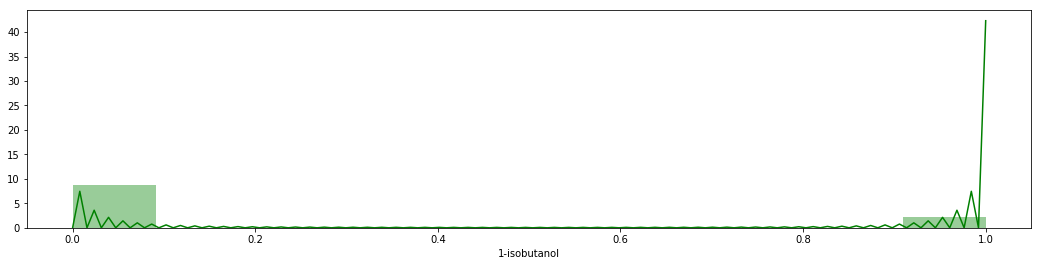

In [49]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['1-Octanol'],color='g'))
plt.figure(figsize=(18,4))
print(sns.distplot(df['1-Propanol'],color='g'))
plt.figure(figsize=(18,4))
print(sns.distplot(df['2-Butanol'],color='g'))
plt.figure(figsize=(18,4))
print(sns.distplot(df['2-propanol'],color='g'))
plt.figure(figsize=(18,4))
print(sns.distplot(df['1-isobutanol'],color='g'))

In [76]:
df['alcohol']=df.loc[df["1-Octanol"] == 1, 'alcohol'] = '1-Octanol'
df.loc[df["1-Propanol"] == 1, 'alcohol'] = '1-Propanol'
df.loc[df["2-Butanol"] == 1, 'alcohol'] = '2-Butanol'
df.loc[df["2-propanol"] == 1, 'alcohol'] = '2-propanol'
df.loc[df["1-isobutanol"] == 1, 'alcohol'] = '1-isobutanol'

In [82]:
df.columns

Index(['0.799_0.201', '0.799_0.201.1', '0.700_0.300', '0.700_0.300.1',
       '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1',
       '0.400_0.600', '0.400_0.600.1', '1-Octanol', '1-Propanol', '2-Butanol',
       '2-propanol', '1-isobutanol', 'alcohol'],
      dtype='object')

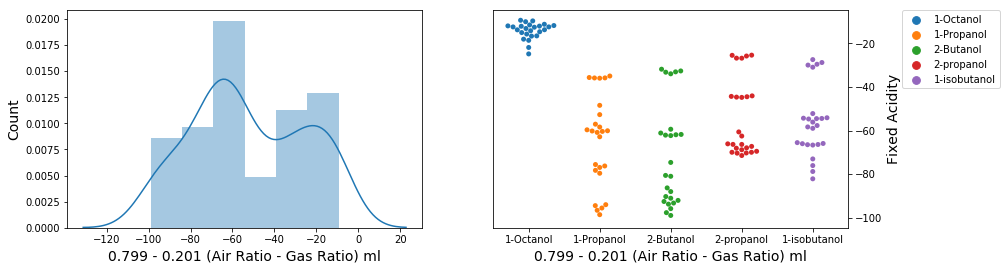

In [85]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(df['0.799_0.201'], ax = axes[0])
axes[0].set_xlabel('0.799 - 0.201 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.swarmplot(x = 'alcohol', y = '0.799_0.201', data = df, hue = 'alcohol',ax = axes[1])
axes[1].set_xlabel('0.799 - 0.201 (Air Ratio - Gas Ratio) ml', fontsize=14)
axes[1].set_ylabel('Fixed Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

Text(0.5, 0, 'Quality')

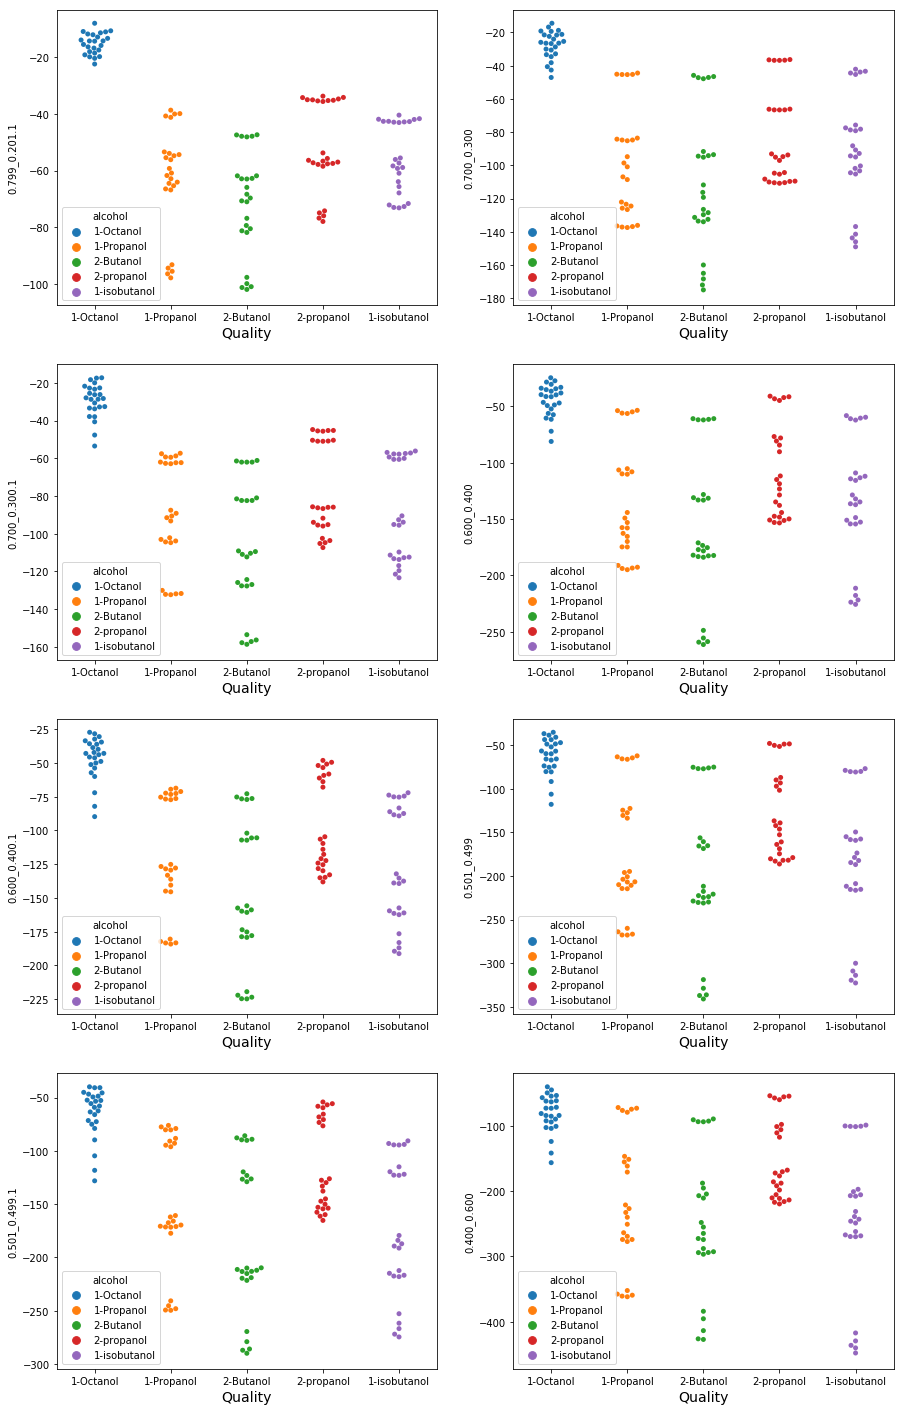

In [93]:
f, axes = plt.subplots(4,2,figsize=(15,25))
sns.swarmplot(x = 'alcohol', y = '0.799_0.201.1', data = df, hue = 'alcohol',ax = axes[0,0])
axes[0,0].set_xlabel('Quality', fontsize=14)

sns.swarmplot(x = 'alcohol', y = '0.700_0.300', data = df, hue = 'alcohol',ax = axes[0,1])
axes[0,1].set_xlabel('Quality', fontsize=14)

sns.swarmplot(x = 'alcohol', y = '0.700_0.300.1', data = df, hue = 'alcohol',ax = axes[1,0])
axes[1,0].set_xlabel('Quality', fontsize=14)

sns.swarmplot(x = 'alcohol', y = '0.600_0.400', data = df, hue = 'alcohol',ax = axes[1,1])
axes[1,1].set_xlabel('Quality', fontsize=14)

sns.swarmplot(x = 'alcohol', y = '0.600_0.400.1', data = df, hue = 'alcohol',ax = axes[2,0])
axes[2,0].set_xlabel('Quality', fontsize=14)

sns.swarmplot(x = 'alcohol', y = '0.501_0.499', data = df, hue = 'alcohol',ax = axes[2,1])
axes[2,1].set_xlabel('Quality', fontsize=14)

sns.swarmplot(x = 'alcohol', y = '0.501_0.499.1', data = df, hue = 'alcohol',ax = axes[3,0])
axes[3,0].set_xlabel('Quality', fontsize=14)
sns.swarmplot(x = 'alcohol', y = '0.400_0.600', data = df, hue = 'alcohol',ax = axes[3,1])
axes[3,1].set_xlabel('Quality', fontsize=14)

In [100]:
df.dtypes

0.799_0.201      float64
0.799_0.201.1    float64
0.700_0.300      float64
0.700_0.300.1    float64
0.600_0.400      float64
0.600_0.400.1    float64
0.501_0.499      float64
0.501_0.499.1    float64
0.400_0.600      float64
0.400_0.600.1    float64
1-Octanol          int64
1-Propanol         int64
2-Butanol          int64
2-propanol         int64
1-isobutanol       int64
dtype: object

In [95]:
df.drop('alcohol',axis=1,inplace=True)

In [6]:
X = df.iloc[:, 0:10].values
y = df.iloc[:, [10,11,12,13,14]].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (100, 10)
Test data set size :  (25, 10)


In [9]:
R_forest = RandomForestClassifier(n_estimators = 200)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = None))

The accuracy of model 2 :  0.92
The f1 score of model 2 :  [1.         1.         1.         0.88888889 0.93333333]


In [10]:
#decison tree

In [11]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [12]:
importance = tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.47627
Feature: 1, Score: 0.05004
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.10066
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.08377
Feature: 7, Score: 0.16686
Feature: 8, Score: 0.12240
Feature: 9, Score: 0.00000


In [13]:
r2_score(y_test,y_pred)

0.6139483065953656